<a href="https://colab.research.google.com/github/Ramprashanth17/info6105-Data-Science/blob/main/ML_Data_Cleaning_%26_Feature_Selection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

Prediction of levels of obesity by using machine learning classification models.

Data collected from UCI Machine Learning Repository.

# About the Data

Dietary, exercise and personal daily habits of individuals from Mexico, Peru and Columbia are recorded to build estimation of obesity levels.

Obesity Level will be used as the target (y) variable, which consists of 7 classes - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

There are 17 attributes in total related to individual habits that are likely to determine obesity levels, such as number of main meals, time using technology devices, gender and transportation used.

Details of the questions and possible answers collected for the data can be found in the link provided above.

In [1]:
# installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=22d6d2792317aa2b8fe9ff1e4211b164d603a142b548eae851e28b6abb804ac4
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
# Importing the required packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


from sklearn.pipeline import Pipeline
# import category_encoders as ce

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# Exploratory Data Analysis


In [3]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Checking for any missing values
null_values = df.isnull().sum()

# Checking for duplicate values
duplicate_values = df.duplicated().sum()

print(f"Number of null values in the dataframe is: \n {null_values}")
print(f"Number of duplicate values in the dataframe is: {duplicate_values}")

Number of null values in the dataframe is: 
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Number of duplicate values in the dataframe is: 24


# Are there missing values?

No, the data doesn't have any missing values

In [5]:
# Dropping the duplicated values
df = df.drop_duplicates()

df.duplicated().sum()

0

# What are the data types?

The dataset contains both numerical and categorical data types as shown below.

In [6]:
columns = df.columns
categorical_columns = [c for c in columns if df[c].dtypes == 'object']
categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [7]:
for i in categorical_columns:
    print(f"{i} : {df[i].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [8]:
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print(numerical_columns)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


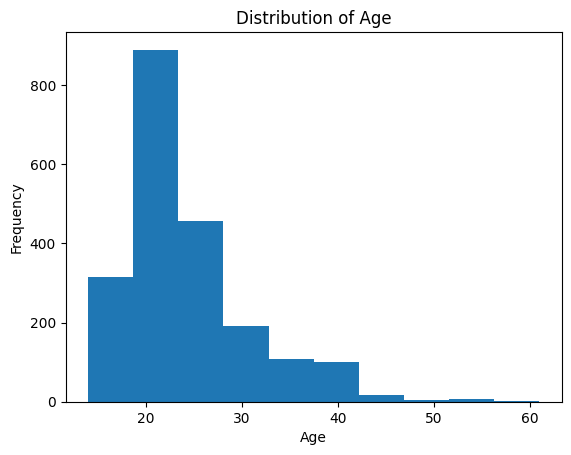

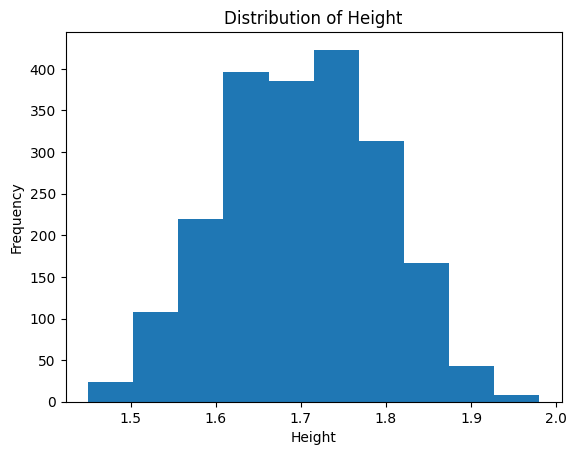

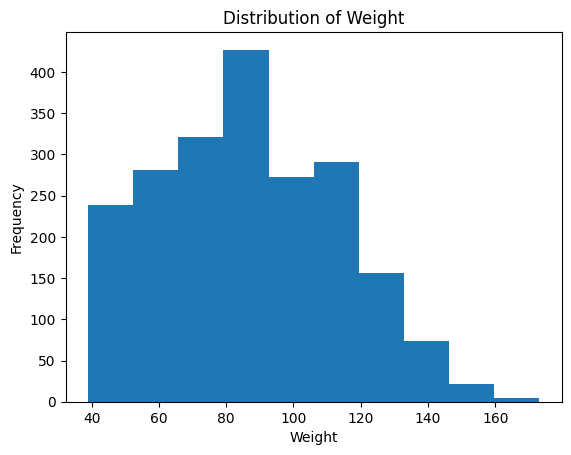

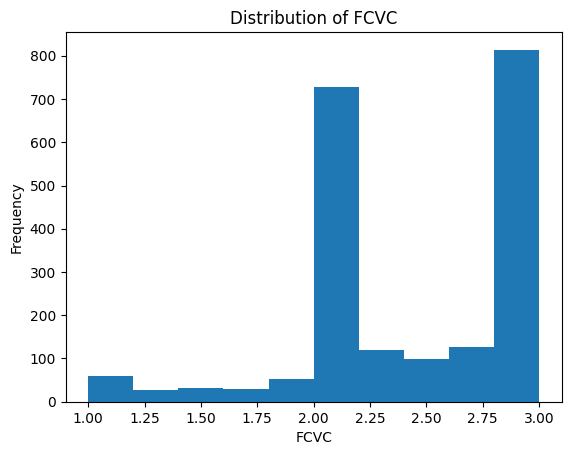

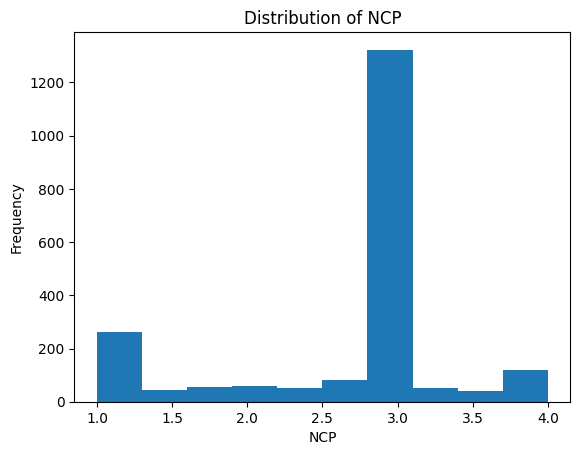

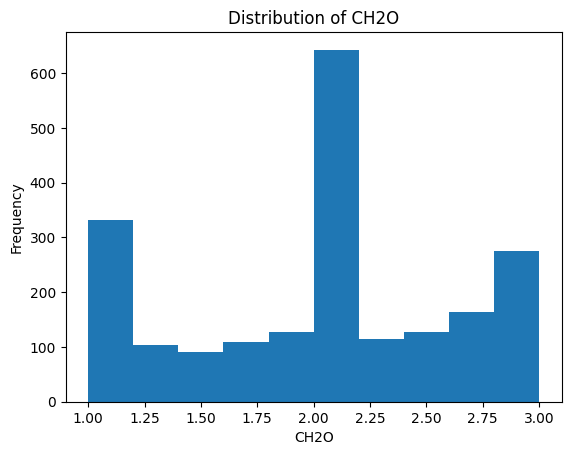

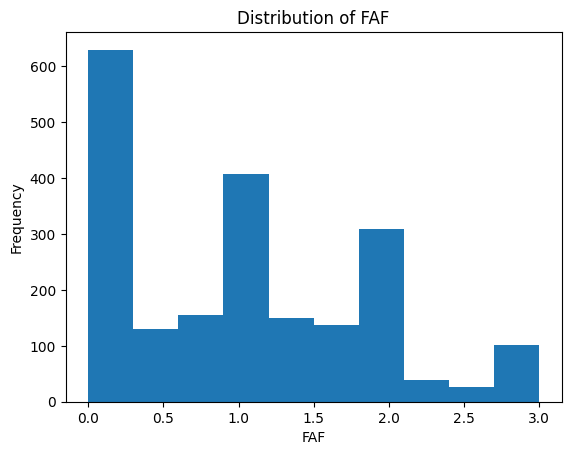

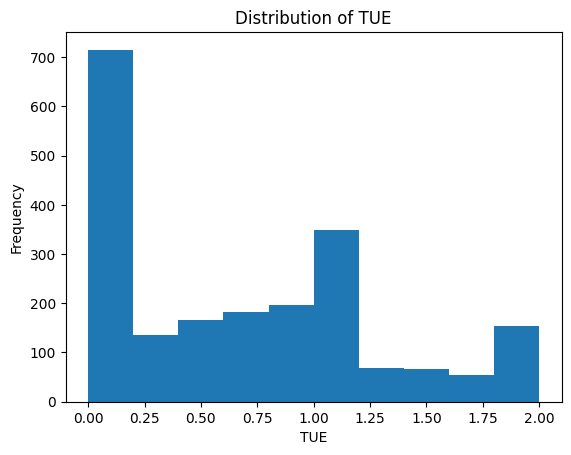

In [10]:
#Plotting the distributions to visualize the numerical variables
for col in df.select_dtypes(include=['int64', 'float64']):
  plt.hist(df[col])
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

# What are the likely distributions of the numeric variables?

As shown in the graphs, some numerical variables follow normal distribution while some follow binomial distribution.


<Axes: >

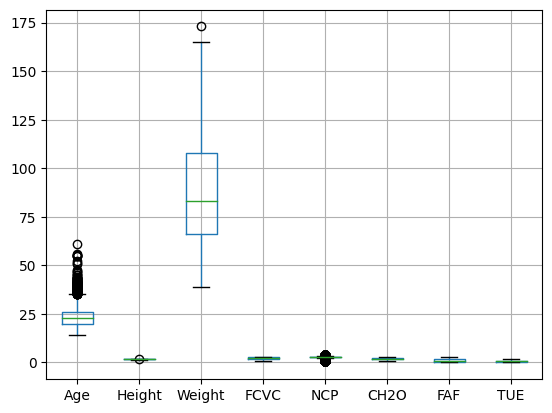

In [11]:
# Likely distributions of the numerical columns
# Box plots
df.boxplot(column=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])

<Figure size 800x500 with 0 Axes>

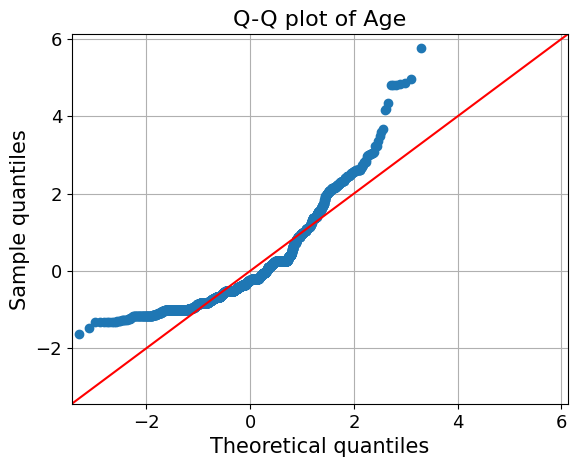

<Figure size 800x500 with 0 Axes>

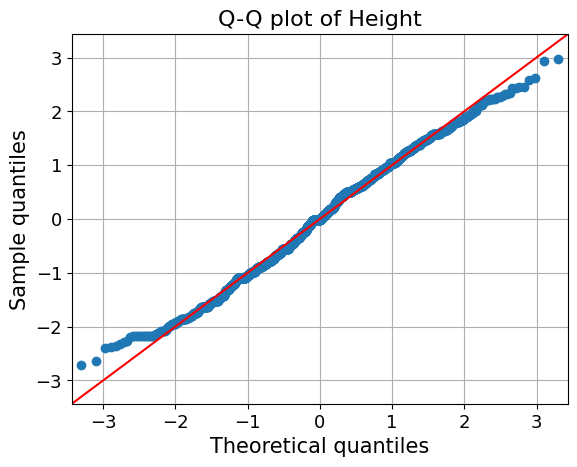

<Figure size 800x500 with 0 Axes>

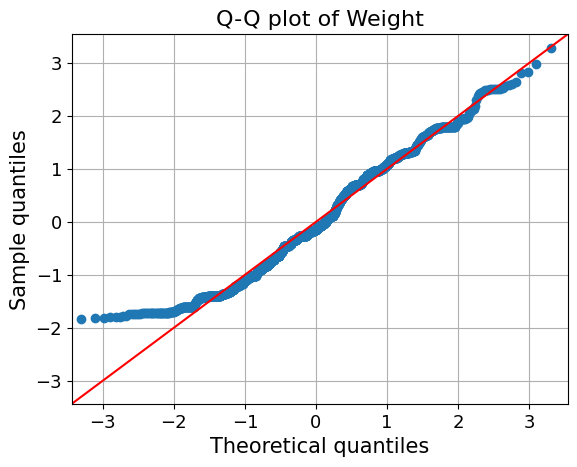

<Figure size 800x500 with 0 Axes>

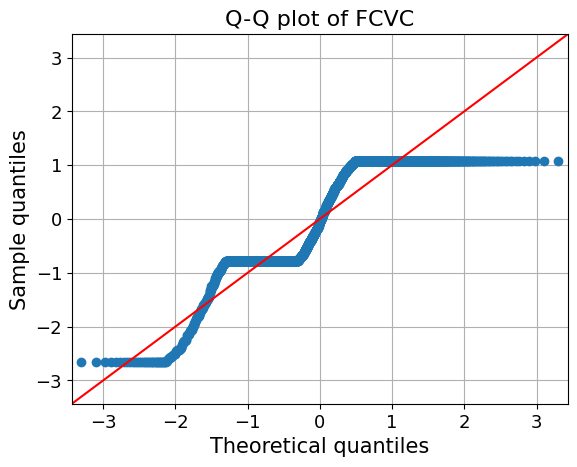

<Figure size 800x500 with 0 Axes>

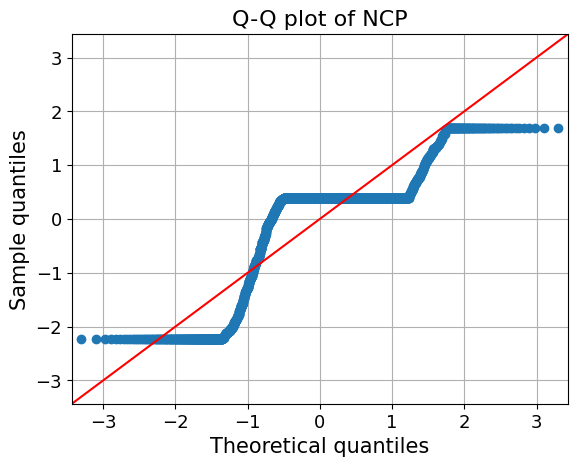

<Figure size 800x500 with 0 Axes>

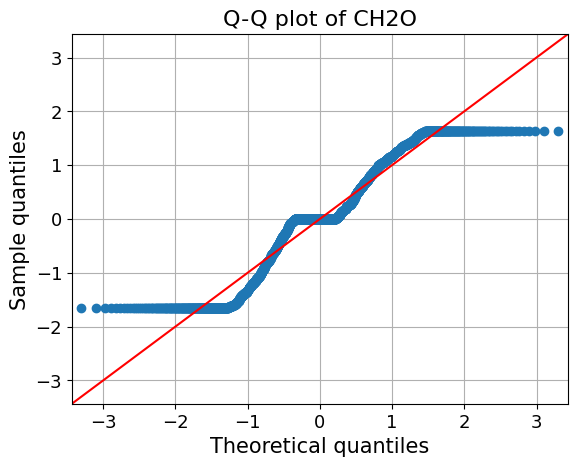

<Figure size 800x500 with 0 Axes>

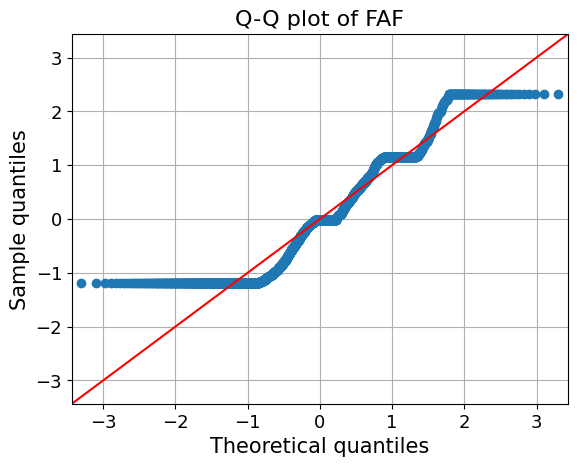

<Figure size 800x500 with 0 Axes>

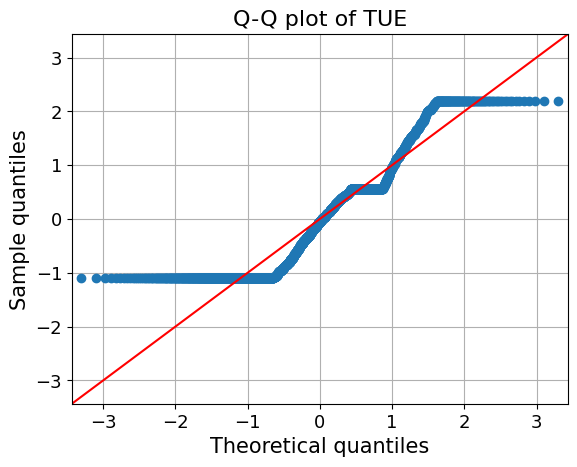

In [12]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

for col in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 5))
    fig = qqplot(df[col], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(col), fontsize=16)
    plt.grid(True)
    plt.show()



In [13]:
df1 = df.copy()

df1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
# Finding independent variables used to predict target value

# Method-1: Using Co-relation Analysis:
# Calculate correlations
df1.corr()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.031748,0.198160,0.013572,-0.055823,-0.044058,-0.148202,-0.302927
Height,-0.031748,1.000000,0.457468,-0.040363,0.227806,0.220487,0.293584,0.041808
Weight,0.198160,0.457468,1.000000,0.216574,0.092149,0.203823,-0.056490,-0.079351
FCVC,0.013572,-0.040363,0.216574,1.000000,0.034885,0.081332,0.022003,-0.104128
NCP,-0.055823,0.227806,0.092149,0.034885,1.000000,0.075335,0.127816,0.015693
CH2O,-0.044058,0.220487,0.203823,0.081332,0.075335,1.000000,0.165310,0.020704
FAF,-0.148202,0.293584,-0.056490,0.022003,0.127816,0.165310,1.000000,0.058716
TUE,-0.302927,0.041808,-0.079351,-0.104128,0.015693,0.020704,0.058716,1.000000


# Finding independent variables used to predict target value

Used Co-relation, Domain Knowledge and Random Feature Elimination

<Axes: >

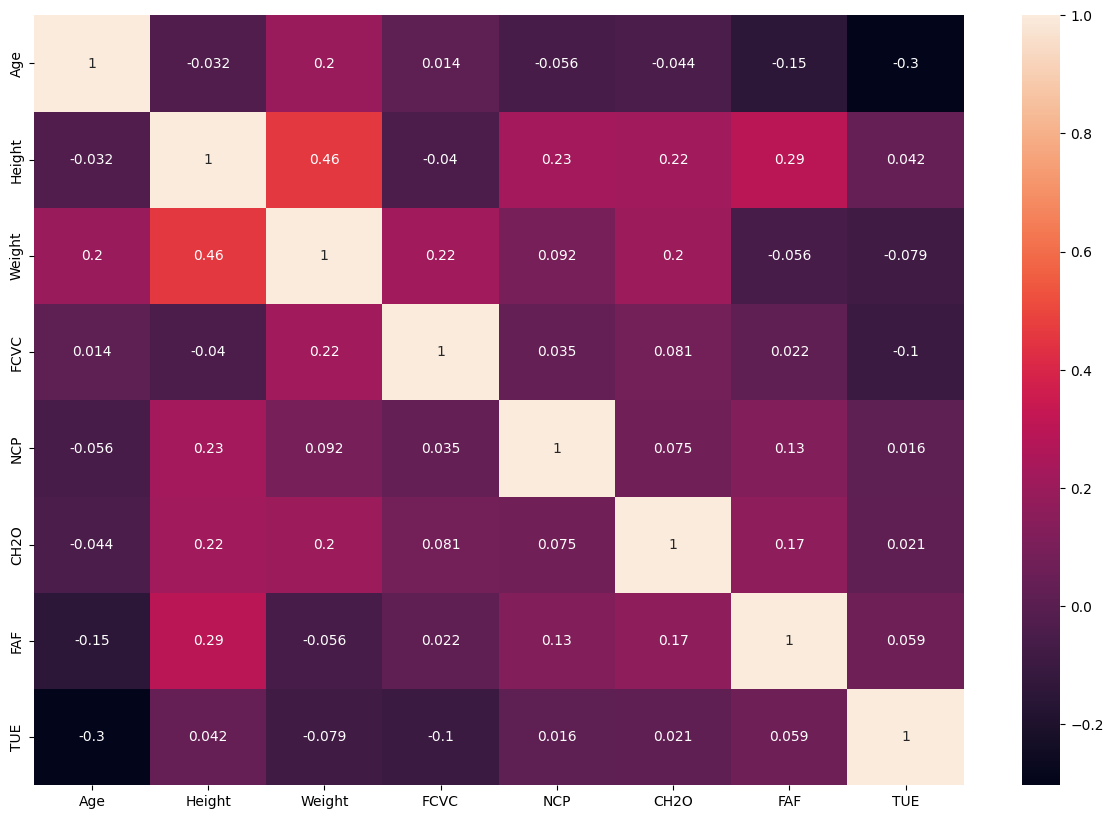

In [15]:
plt.figure(figsize=(15,10))
sn.heatmap(df.corr(), annot = True)

# Which independent variables have missing data? How much?

No, the independent variables doesn't have missing data.

In [16]:
X = df1.iloc[:,:-1]
y = df1.iloc[:, -1]
y = pd.DataFrame(y, columns=['NObeyesdad'])


In [17]:
labels = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a dictionary to map labels to numbers starting from 1
label_to_number = {label: i + 1 for i, label in enumerate(labels)}

# Map the condition labels to numeric values
y['NObeyesdad'] = y['NObeyesdad'].map(label_to_number)
y.head()

,NObeyesdad
0,1
1,1
2,1
3,2
4,3


In [18]:
# Custom function for binary encoding
def binary_encode(df1, columns):
    obesity = df1.copy() #ensure that the function is safe and does not modify the DataFrame passed to it unexpectedly.
    label_encoder = LabelEncoder()
    for col in columns:
        obesity[col] = label_encoder.fit_transform(obesity[col])
    return obesity

In [19]:
!pip install category_encoders

import category_encoders as ce
# Columns for binary encoding, one-hot encoding, and category encoding
binary_columns = ['Gender', 'FAVC', 'SMOKE', 'SCC', 'family_history_with_overweight']
onehot_encoded_columns = ['CALC', 'MTRANS']
category_encoded_columns = ['CAEC']

# Creating a pipeline for binary encoding
binary_pipeline = Pipeline(steps=[
    ('binary_encode', FunctionTransformer(binary_encode, kw_args={'columns': binary_columns}))
])

# Creating a pipeline for category encoding
category_pipeline = Pipeline(steps=[
    ('category_encode', ce.OrdinalEncoder(cols=category_encoded_columns))
])

# Creating the ColumnTransformer
categorical_transformer = ColumnTransformer(
    transformers=[
        ('binary', binary_pipeline, binary_columns),
        ('onehot', OneHotEncoder(), onehot_encoded_columns),
        ('category', category_pipeline, category_encoded_columns)
    ],
    remainder='passthrough'  # leave the rest of the columns unchanged
)

# Applying the ColumnTransformer to the DataFrame
X_categorical_transformed = categorical_transformer.fit_transform(X)

# Getting new column names
binary_encoded_names = binary_columns  # Binary encoded columns names remain the same
onehot_encoded_names = categorical_transformer.named_transformers_['onehot'].get_feature_names_out(onehot_encoded_columns)
category_encoded_names = categorical_transformer.named_transformers_['category'].get_feature_names_out(category_encoded_columns)

new_columns = binary_encoded_names + list(onehot_encoded_names) + list(category_encoded_names)
new_columns += [col for col in X.columns if col not in binary_columns + onehot_encoded_columns + category_encoded_columns]

# Creating the new DataFrame with the new column names
obesity_encoded_obesity = pd.DataFrame(X_categorical_transformed, columns=new_columns)

obesity_encoded_obesity.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


# Do the training and test sets have the same data?

No, the training and test sets are different. The data has been splitted.

# Is the predictor variables independent of all the other predictor variables?

Yes, except for Weight all the other predictor variables are independent.

# Which predictor variables are the most important?

Weight, Height, FACVC, Age, TUF etc are important.

# Do the ranges of the predictor variables make sense?

Yes,Approximately the predictor variable values are nearer to the actual values

# What are the distributions of the predictor variables?

They follow normal and binomial distributions.

In [20]:
obesity_encoded_obesity.describe()

,Gender,FAVC,SMOKE,SCC,family_history_with_overweight,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.504073,0.883565,0.021083,0.045999,0.825108,0.000479,0.033541,0.661236,0.304744,0.218495,0.003354,0.005271,0.746526,0.026354,1.217058,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,0.500103,0.320823,0.143695,0.209533,0.379966,0.021890,0.180088,0.473403,0.460409,0.413324,0.057831,0.072426,0.435104,0.160223,0.572070,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
#Performing a Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(obesity_encoded_obesity, y, test_size=0.25, random_state=42)

Create a logistic regression model called lr. Include the parameter max_iter=1000 to make sure that the model will converge when you try to fit it.

Fit the model
Use the .fit() method on lr to fit the model to X and y.


In [23]:
lr = LogisticRegression(max_iter=1000)

In [24]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

# Model accuracy
A model's accuracy is the proportion of classes that the model correctly predicts. is Compute and print the accuracy of lr by using the .score() method. What percentage of respondents did the model correctly predict as being either obese or not obese? You may want to write this number down somewhere so that you can refer to it during future tasks.

In [25]:
print(lr.score(X_train,y_train))

0.8306709265175719


In [26]:

sfs = SFS(lr,
         k_features=10,
         forward = True,
         floating=False,
         cv=0,
         scoring='accuracy')

In [27]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(10, 10), scoring='accuracy')

In [28]:
print(sfs.subsets_[10])

{'feature_idx': (0, 1, 5, 6, 8, 9, 11, 15, 16, 17), 'cv_scores': array([0.83450479]), 'avg_score': 0.8345047923322684, 'feature_names': ('Gender', 'FAVC', 'CALC_Always', 'CALC_Frequently', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Motorbike', 'Age', 'Height', 'Weight')}


In [29]:
# Print the chosen feature names
print(print(sfs.subsets_[10]['feature_names']))
# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[10]['avg_score'])

('Gender', 'FAVC', 'CALC_Always', 'CALC_Frequently', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Motorbike', 'Age', 'Height', 'Weight')
None
0.8345047923322684


<Figure size 2000x3000 with 0 Axes>

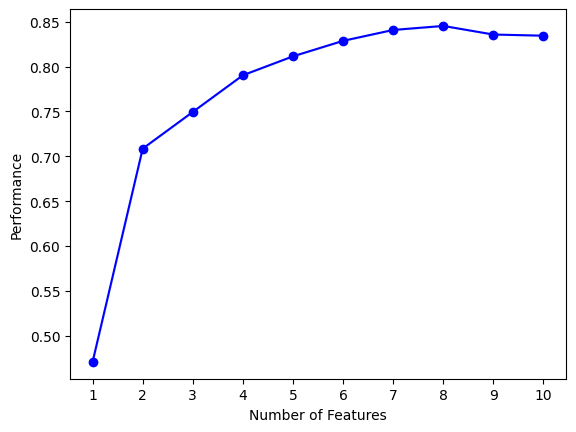

In [30]:
%matplotlib inline

plt.figure(figsize=(20, 30))  # Define the figure size before plotting
plot_sfs(sfs.get_metric_dict())  # Your plotting function should come after setting the figure size
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the parameter grid for Grid Search
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 500, 1000]}

In [32]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [35]:
# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()

# Best parameters
best_params = grid_search.best_params_

# Initialize the logistic regression model with the best parameters
best_lr = LogisticRegression(**best_params)

# Cross-validation scores
cross_val_scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy')

# Print the best parameters and cross-validation scores
print("Best Parameters:", best_params)
print("Cross-Validation Accuracy Scores:", cross_val_scores)

Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
Cross-Validation Accuracy Scores: [0.85303514 0.85942492 0.84345048 0.86900958 0.86900958]


In [36]:
# Print mean and standard deviation
print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_score}")

# Retrain the model on the entire dataset
best_lr.fit(obesity_encoded_obesity, y)

# If you have a separate test set, evaluate the model on it
# test_accuracy = best_lr.score(X_test, y_test) # Uncomment if you have a test set

# Final model evaluation
final_accuracy = best_lr.score(X_test, y_test)

# Print the final model accuracy
print(f"Final Model Accuracy on Training Data: {final_accuracy}")

Mean Cross-Validation Accuracy: 0.8587859424920128
Standard Deviation of Cross-Validation Accuracy: 0.009774478300816836
Final Model Accuracy on Training Data: 0.8620689655172413


# Imputation methods and checking the model

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error


# Choose only numeric columns for simplicity in calculating errors
data_numeric = df.select_dtypes(include=[np.number])

# Split the data into training and test sets
X_train, X_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Function to remove a random percentage of data
def remove_random_data(df, percentage):
    df_copy = df.copy()
    for column in df_copy.columns:
        num_missing = int(df_copy[column].shape[0] * percentage)
        missing_indices = np.random.choice(df_copy[column].shape[0], num_missing, replace=False)
        df_copy.iloc[missing_indices, df_copy.columns.get_loc(column)] = np.nan
    return df_copy

# Function to evaluate imputation
def evaluate_imputation(original_data, imputed_data):
    mse = mean_squared_error(original_data, imputed_data)
    return np.sqrt(mse)  # Return RMSE for easier interpretation

# Imputation methods
imputers = {
    'mean': SimpleImputer(strategy='mean'),
    'median': SimpleImputer(strategy='median'),
    'knn': KNNImputer(n_neighbors=5)
}
# Percentages of data to remove
percentages = [0.01, 0.05, 0.10]

# Store results
results = {}

for percentage in percentages:
    X_train_missing = remove_random_data(X_train, percentage)
    results[percentage] = {}

    for name, imputer in imputers.items():
        imputed = imputer.fit_transform(X_train_missing)
        rmse = evaluate_imputation(X_train, imputed)
        results[percentage][name] = rmse

# Display the results
for percentage, methods in results.items():
    print(f"\nPercentage of data removed: {percentage * 100}%")
    for method, rmse in methods.items():
        print(f"Imputation Method: {method}, RMSE: {rmse}")


Percentage of data removed: 1.0%
Imputation Method: mean, RMSE: 0.9175711174634424
Imputation Method: median, RMSE: 0.9123297811110459
Imputation Method: knn, RMSE: 0.8064553701801845

Percentage of data removed: 5.0%
Imputation Method: mean, RMSE: 2.086137743220921
Imputation Method: median, RMSE: 2.1083227462029552
Imputation Method: knn, RMSE: 1.4915804651169533

Percentage of data removed: 10.0%
Imputation Method: mean, RMSE: 3.230886594196304
Imputation Method: median, RMSE: 3.2809406406174397
Imputation Method: knn, RMSE: 2.2925734494469734


In [43]:
# confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


data = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

target_variable = 'NObeyesdad'
predictor_variables = ['Gender',
                      'family_history_with_overweight',
                      'FAVC',
                      'CAEC',
                      'SMOKE',
                      'SCC',
                      'CALC',
                      'MTRANS']

data = pd.get_dummies(data, columns=predictor_variables)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(obesity_encoded_obesity, y, test_size=0.25, random_state=42)
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model on your training data
model.fit(X_train, y_train)

# Obtain predictions on your testing data (or a separate dataset)
predicted_labels = model.predict(X_test)
predicted_labels = model.predict(X_test)
cm = confusion_matrix(y_test, predicted_labels)
print(cm)



[[43 17  9  0  7  0  0]
 [ 2 37 32  0  0  0  0]
 [ 0  0 41 16  0  0  0]
 [ 0  0  0 82  0  3  0]
 [ 7  0  0  0 67  0  0]
 [ 0  0  0  5  0 77  0]
 [ 0  0  0  0  0  0 77]]


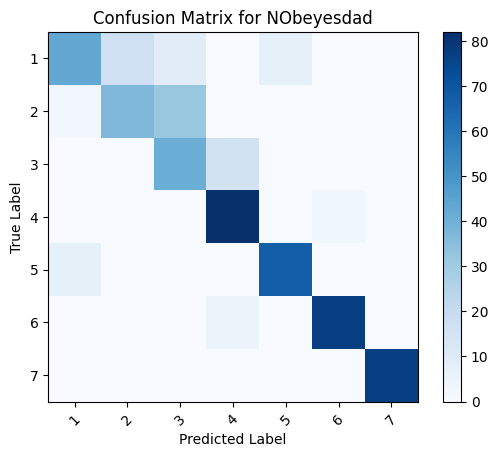

In [44]:
# Create a visual representation of the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for NObeyesdad")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y_test))), np.unique(y_test), rotation=45)
plt.yticks(np.arange(len(np.unique(y_test))), np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Confusion Matrix for Categorical Columns

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
